In [1]:
# !pip install functions
# !pip install nbconvert
# !export PATH=/Library/TeX/texbin:$PATH
import os
os.environ['PATH'].split(';')
# !pip install pdflatex

['/home/avocado/anaconda3/bin:/home/avocado/anaconda3/condabin:/home/avocado/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin']

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
from scipy.integrate import quad
from functools import partial
from scipy.fftpack import fft, ifft
from scipy.interpolate import interp1d

# from functions.BS_pricer import BS_pricer
# from functions.Parameters import Option_param
# from functions.Processes import Merton_process
# from functions.Merton_pricer import Merton_pricer
# from functions.Processes import VG_process
# from functions.VG_pricer import VG_pricer

In [11]:
def cf_normal(u,mu=1,sig=2):
    return np.exp(1j*u*mu-0.5*u**2*sig**2)

In [12]:
def cf_gamma(u,a=1,b=2):
    return (1-b*u*1j)**(-a)

In [13]:
def cf_poisson(u,lam=1):
    return np.exp(lam*(np.exp(1j*u)-1))

In [14]:
# Giz Peleaz
# right_lim is the right extreme of integration
# cf is the characteristic function
def Gil_Pelaez_pdf(x, cf, right_lim):               
    integrand = lambda u: np.real( np.exp(-u*x*1j) * cf(u) )
    return 1/np.pi * quad(integrand, 1e-15, right_lim )[0]

## Normal

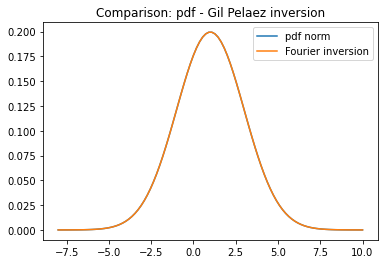

In [18]:
x = np.linspace(-8,10,100)
plt.plot(x,ss.norm.pdf(x, loc=1, scale=2), label="pdf norm")
plt.plot(x,[Gil_Pelaez_pdf(i,cf_normal,np.inf) for i in x], label="Fourier inversion" )
plt.title("Comparison: pdf - Gil Pelaez inversion"); plt.legend()
plt.show()

## Gamma

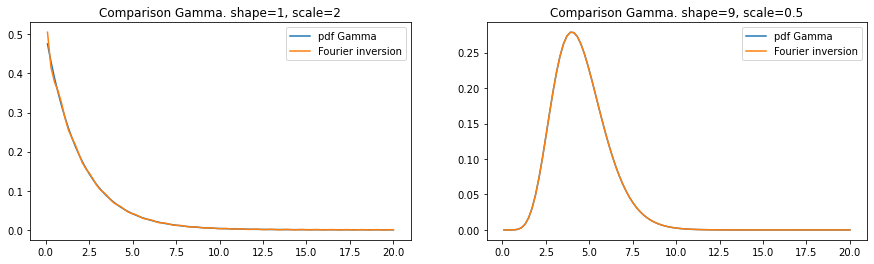

In [19]:
xx = np.linspace(0.1,20,100)
a = 1     #shape parameter
b = 2     #scale parameter
c = 9     #shape parameter
d = 0.5   #scale parameter
lim_ab = 24
lim_cd = np.inf
cf_gamma_ab = partial(cf_gamma, a=a, b=b)   # function binding 
cf_gamma_cd = partial(cf_gamma, a=c, b=d)   # function binding 

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(xx,ss.gamma.pdf(xx, a, scale=b), label="pdf Gamma")
ax1.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_ab, lim_ab) for i in xx], label="Fourier inversion" )
ax1.set_title("Comparison Gamma. shape=1, scale=2"); ax1.legend()
ax2.plot(xx,ss.gamma.pdf(xx,c, scale=d), label="pdf Gamma")
ax2.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_cd, lim_cd) for i in xx], label="Fourier inversion" )
ax2.set_title("Comparison Gamma. shape=9, scale=0.5"); ax2.legend()
plt.show()


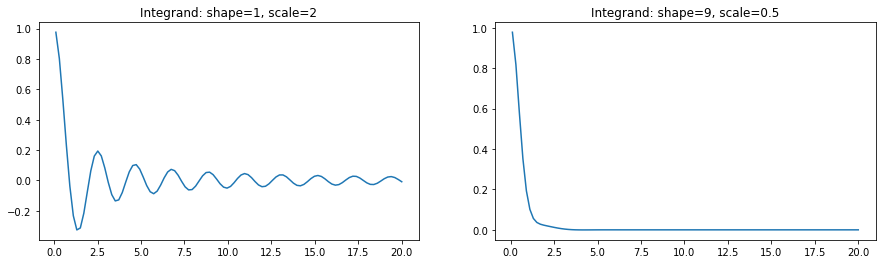

In [20]:
# Let's have a look at the plot of the integrands: (at the point x=3)

u = np.linspace(0.1,20,100)
x = 3
f = lambda u: np.real( np.exp(-u*x*1j) * cf_gamma_ab(u) )  # integrand
g = lambda u: np.real( np.exp(-u*x*1j) * cf_gamma_cd(u) )

fig = plt.figure(figsize=(15,4)); ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(u, f(u)); ax1.set_title("Integrand: shape=1, scale=2")
ax2.plot(u, g(u)); ax2.set_title("Integrand: shape=9, scale=0.5")
plt.show()

## Poisson

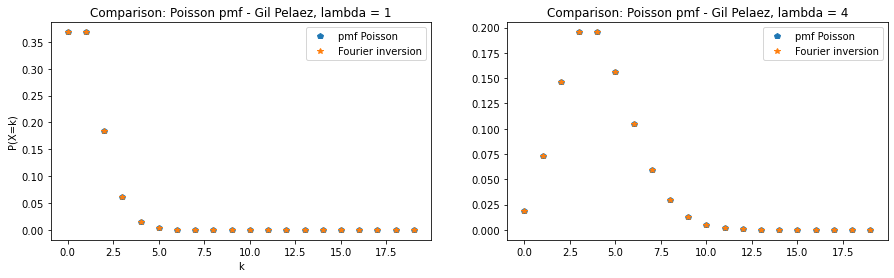

In [21]:
k = np.array(range(20))
lam = 4
cf_poisson4 = partial(cf_poisson, lam=lam)   # function binding to lam=4

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(k, ss.poisson.pmf(k, 1), linestyle="None", marker='p', label="pmf Poisson")  # with lam=1 
ax1.plot(k, [Gil_Pelaez_pdf(i,cf_poisson, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )      # lam=1 by default
ax1.set_xlabel("k"); ax1.set_ylabel("P(X=k)")
ax1.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 1"); ax1.legend()
ax2.plot(k, ss.poisson.pmf(k, lam), linestyle="None", marker='p', label="pmf Poisson")
ax2.plot(k, [Gil_Pelaez_pdf(i,cf_poisson4, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )
ax2.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 4"); ax2.legend()
plt.show()